In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline
#from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2


In [2]:
population = pd.read_csv('/Users/richardlafferty/Downloads/world-bank-data-1960-to-2016/country_population.csv')
fertility = pd.read_csv('/Users/richardlafferty/Downloads/world-bank-data-1960-to-2016/fertility_rate.csv')
life_expectancy = pd.read_csv('/Users/richardlafferty/Downloads/world-bank-data-1960-to-2016/life_expectancy.csv')

In [3]:
display(population.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [4]:
population = population.dropna()
fertility = fertility.dropna()
life_expectancy = life_expectancy.dropna()
#continent_name = pc.country_alpha3_to_continent_code(population['Country Code'])
#continent_name = pc.country_alpha3_to_continent_code(population['Country Code'])


In [5]:

print(population.describe())
#explore data
display(population.head())
#check columns list
population.columns.to_list()

               1960          1961          1962          1963          1964  \
count  2.580000e+02  2.580000e+02  2.580000e+02  2.580000e+02  2.580000e+02   
mean   1.190653e+08  1.206665e+08  1.228050e+08  1.254657e+08  1.281475e+08   
std    3.747063e+08  3.792121e+08  3.858231e+08  3.944327e+08  4.030878e+08   
min    4.279000e+03  4.453000e+03  4.566000e+03  4.656000e+03  4.748000e+03   
25%    5.313490e+05  5.441592e+05  5.575528e+05  5.684930e+05  5.791700e+05   
50%    3.720409e+06  3.817784e+06  3.920245e+06  4.050336e+06  4.172302e+06   
75%    2.595786e+07  2.681488e+07  2.768918e+07  2.857802e+07  2.946820e+07   
max    3.032160e+09  3.073369e+09  3.126510e+09  3.191786e+09  3.257460e+09   

               1965          1966          1967          1968          1969  \
count  2.580000e+02  2.580000e+02  2.580000e+02  2.580000e+02  2.580000e+02   
mean   1.308961e+08  1.337911e+08  1.366808e+08  1.396220e+08  1.427068e+08   
std    4.119820e+08  4.214471e+08  4.308663e+08  4.

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [6]:
#display(population.head())
#display(fertility.head())
#display(life_expectancy.head())

In [7]:
#display(life_expectancy.head())

In [8]:
#function to process each csv file. Dropping null values. Melting datasets to help with analysis.
def process_data(df, value_name):
    
    years = [str(i) for i in range(1960, 2016)]

    df.drop(['Country Code','Indicator Name','Indicator Code'], 
                 axis=1, 
                 inplace=True)
    
    df.dropna(axis=0, inplace=True)
    
    df = pd.melt(df,
                 id_vars='Country Name',
                 value_vars=years,
                 var_name='Year',
                 value_name=value_name)
    
    return df

population = process_data(population, 'Population')
fertility = process_data(fertility, 'Fertility Rate, total (births per woman)')
life_expectancy = process_data(life_expectancy, 'Life expectancy at birth')

In [9]:
#display(population.sample(10))
df = pd.merge(population, life_expectancy, how='left', on=['Country Name', 'Year'])
df = pd.merge(df, fertility, how='left', on=['Country Name', 'Year'])

In [10]:
#display(df.head(100))
#df['Country Name'].unique().tolist()

In [11]:
df['Year'] = df.Year.astype('float')
df.dtypes


Country Name                                 object
Year                                        float64
Population                                  float64
Life expectancy at birth                    float64
Fertility Rate, total (births per woman)    float64
dtype: object

In [12]:
#df_a = df.groupby('Year').Population.mean()
#print(df_a)

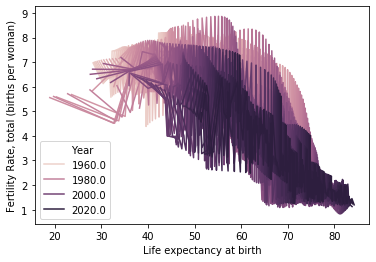

In [13]:
ax = sns.lineplot(data=df, y='Fertility Rate, total (births per woman)', x='Life expectancy at birth', hue='Year')


In [14]:
sixties = df.loc[df['Year'] <= 1969]
seventies = df.loc[(df['Year'] >= 1970) & (df['Year'] <= 1979)]
eighties = df.loc[(df['Year'] > 1979) & (df['Year'] <= 1989)]
nineties = df.loc[(df['Year'] > 1989) & (df['Year'] <= 1999)]
aughts = df.loc[(df['Year'] > 1999) & (df['Year'] <= 2009)]
to_2016 = df.loc[df['Year'] >= 2010]


In [15]:
#print(sixties)
print(df.loc[df['Country Name'] == 'United Kingdom'])

         Country Name    Year  Population  Life expectancy at birth  \
78     United Kingdom  1960.0  52400000.0                 71.126829   
336    United Kingdom  1961.0  52800000.0                 70.878049   
594    United Kingdom  1962.0  53250000.0                 70.926829   
852    United Kingdom  1963.0  53650000.0                 70.826829   
1110   United Kingdom  1964.0  54000000.0                 71.624390   
1368   United Kingdom  1965.0  54348050.0                 71.624390   
1626   United Kingdom  1966.0  54648500.0                 71.573171   
1884   United Kingdom  1967.0  54943600.0                 72.124390   
2142   United Kingdom  1968.0  55211700.0                 71.724390   
2400   United Kingdom  1969.0  55441750.0                 71.721951   
2658   United Kingdom  1970.0  55663250.0                 71.973171   
2916   United Kingdom  1971.0  55896223.0                 72.273171   
3174   United Kingdom  1972.0  56086065.0                 72.124390   
3432  

In [16]:
Western_Europe = ['Belgium',
                 'Denmark',
                 'Finland',
                 'France',
                 'Germany',
                 'Iceland',
                 'Ireland',
                 'Italy',
                 'Netherlands',
                 'Norway',
                 'Portugal',
                 'Spain',
                 'Sweden',
                 'United Kingdom']
#using list to find western europe countries
western_europe = df.loc[df['Country Name'].apply(lambda x: x in Western_Europe)]
western_europe = df.loc[df['Country Name'].isin(Western_Europe)]

In [17]:
print(western_europe)

         Country Name    Year  Population  Life expectancy at birth  \
15            Belgium  1960.0   9153489.0                 69.701951   
53            Germany  1960.0  72814900.0                 69.310024   
56            Denmark  1960.0   4579603.0                 72.176585   
67              Spain  1960.0  30455000.0                 69.109268   
72            Finland  1960.0   4429634.0                 68.819756   
74             France  1960.0  46814237.0                 69.868293   
78     United Kingdom  1960.0  52400000.0                 71.126829   
107           Ireland  1960.0   2828600.0                 69.796512   
110           Iceland  1960.0    175574.0                 73.423171   
112             Italy  1960.0  50199700.0                 69.123902   
171       Netherlands  1960.0  11486631.0                 73.392683   
172            Norway  1960.0   3581239.0                 73.549756   
189          Portugal  1960.0   8857716.0                 62.808927   
216   

In [18]:
western_europe_aughts = aughts.loc[aughts['Country Name'].isin(Western_Europe)]

In [19]:
western_europe_recent = to_2016.loc[to_2016['Country Name'].isin(Western_Europe)]

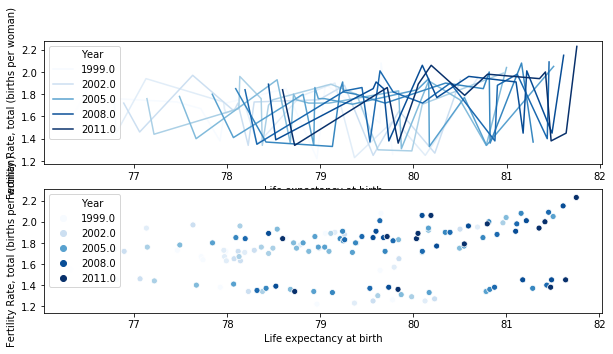

In [20]:
plt.subplots(figsize=(10, 5))
plt.subplot(211)
ax = sns.lineplot(data=western_europe_aughts, y='Fertility Rate, total (births per woman)', x='Life expectancy at birth', hue='Year', palette='Blues')
plt.subplot(212)
ax1 = sns.scatterplot(data=western_europe_aughts, y='Fertility Rate, total (births per woman)', x='Life expectancy at birth', hue='Year', palette='Blues')

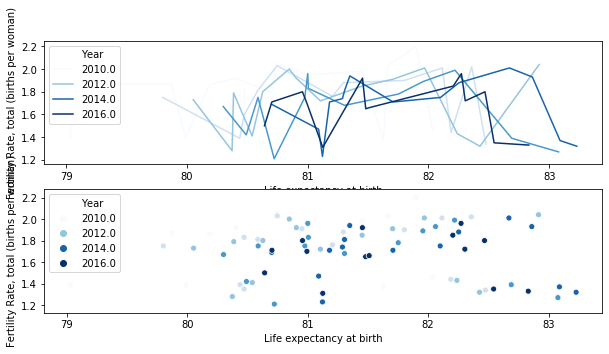

In [21]:
plt.subplots(figsize=(10, 5))
plt.subplot(211)
ax = sns.lineplot(data=western_europe_recent, y='Fertility Rate, total (births per woman)', x='Life expectancy at birth', hue='Year', palette='Blues')
plt.subplot(212)
ax1 = sns.scatterplot(data=western_europe_recent, y='Fertility Rate, total (births per woman)', x='Life expectancy at birth', hue='Year', palette='Blues')

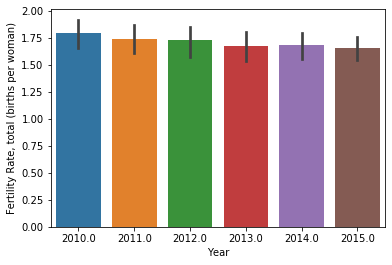

In [22]:
ax = sns.barplot(data=western_europe_recent, x='Year', y='Fertility Rate, total (births per woman)')

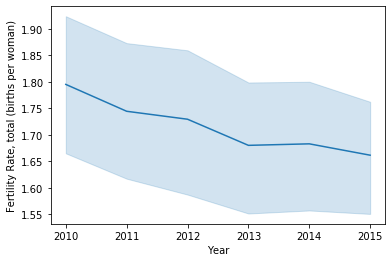

In [23]:
ax = sns.lineplot(data=western_europe_recent, x='Year', y='Fertility Rate, total (births per woman)')

In [24]:
japan = df.loc[df['Country Name'] == 'Japan']
japan_after_2k = japan.loc[japan['Year'] >= 2000]
japan_pre_2k = japan.loc[japan['Year'] < 2000]

In [25]:

western_europe_after_2k = western_europe.loc[western_europe['Year'] >= 2000]
western_europe_pre_2k = western_europe.loc[western_europe['Year'] < 2000]

In [26]:
america = df.loc[df['Country Name'] == 'United States']
america_after_2k = america.loc[america['Year'] >= 2000]
america_pre_2k = america.loc[america['Year'] < 2000]

In [27]:
display(america.head())

,Country Name,Year,Population,Life expectancy at birth,"Fertility Rate, total (births per woman)"
243,United States,1960.0,180671000.0,69.770732,3.654
501,United States,1961.0,183691000.0,70.270732,3.620
759,United States,1962.0,186538000.0,70.119512,3.461
1017,United States,1963.0,189242000.0,69.917073,3.319
1275,United States,1964.0,191889000.0,70.165854,3.190


# The greying population problem

In many advanced economies across the globe, there are several problems with the aging population.

* A decline in working-age labor
* Rising healthcare costs
* Detrimental changes to the economy


Text(0.5, 1.0, 'Worldwide fertility to life expectancy')

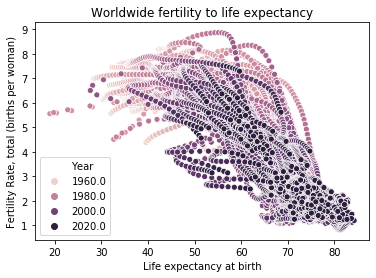

In [28]:
plt.figsize=(20,10)
ax = sns.scatterplot(x=df['Life expectancy at birth'], y=df['Fertility Rate, total (births per woman)'], hue=df['Year'])
ax.set_title('Worldwide fertility to life expectancy')

(array([66., 68., 70., 72., 74., 76., 78., 80., 82., 84., 86.]),
 <a list of 11 Text yticklabel objects>)

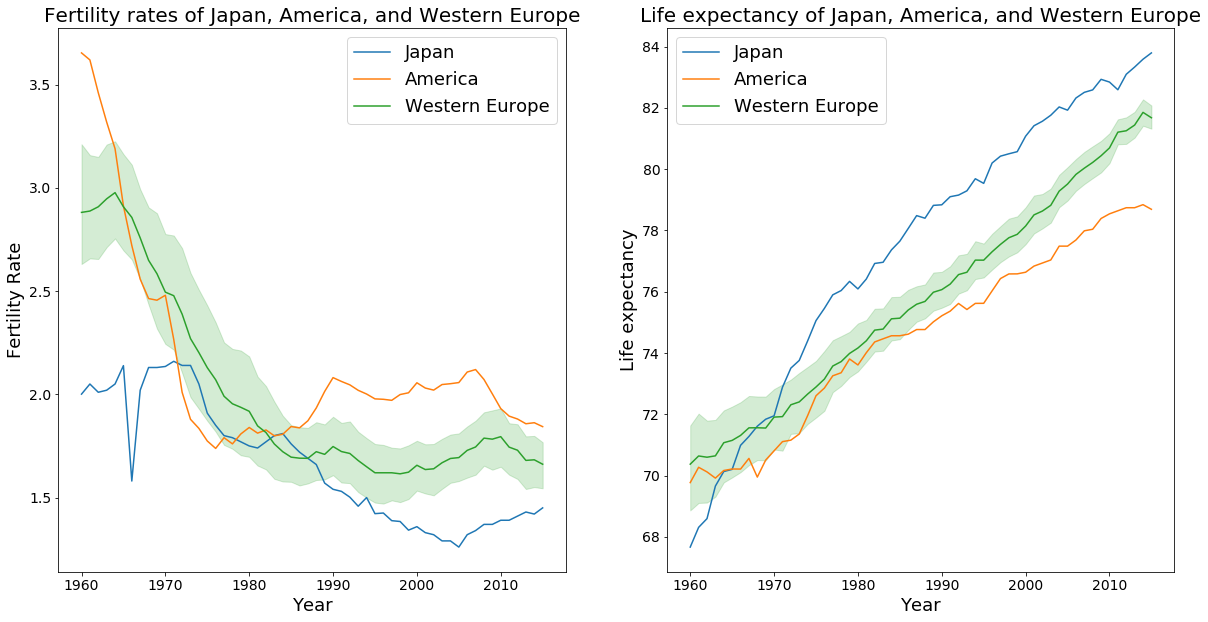

In [29]:
plt.subplots(figsize=(20,10))
plt.subplot(121)

ax = sns.lineplot(data=japan, x='Year', y='Fertility Rate, total (births per woman)')
ax = sns.lineplot(data=america, x='Year', y='Fertility Rate, total (births per woman)')
ax = sns.lineplot(data=western_europe, x='Year', y='Fertility Rate, total (births per woman)')

ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Fertility Rate', fontsize=18)
ax.set_title('Fertility rates of Japan, America, and Western Europe', fontsize= 20)
ax.legend(['Japan', 'America', 'Western Europe'], fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(122)

ax1 = sns.lineplot(data=japan, x='Year', y='Life expectancy at birth')
ax1 = sns.lineplot(data=america, x='Year', y='Life expectancy at birth')
ax1 = sns.lineplot(data=western_europe, x='Year', y='Life expectancy at birth')

ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Life expectancy', fontsize=18)
ax1.set_title('Life expectancy of Japan, America, and Western Europe', fontsize= 20)
ax1.legend(['Japan', 'America', 'Western Europe'], fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Text(0, 0.5, 'Fertility')

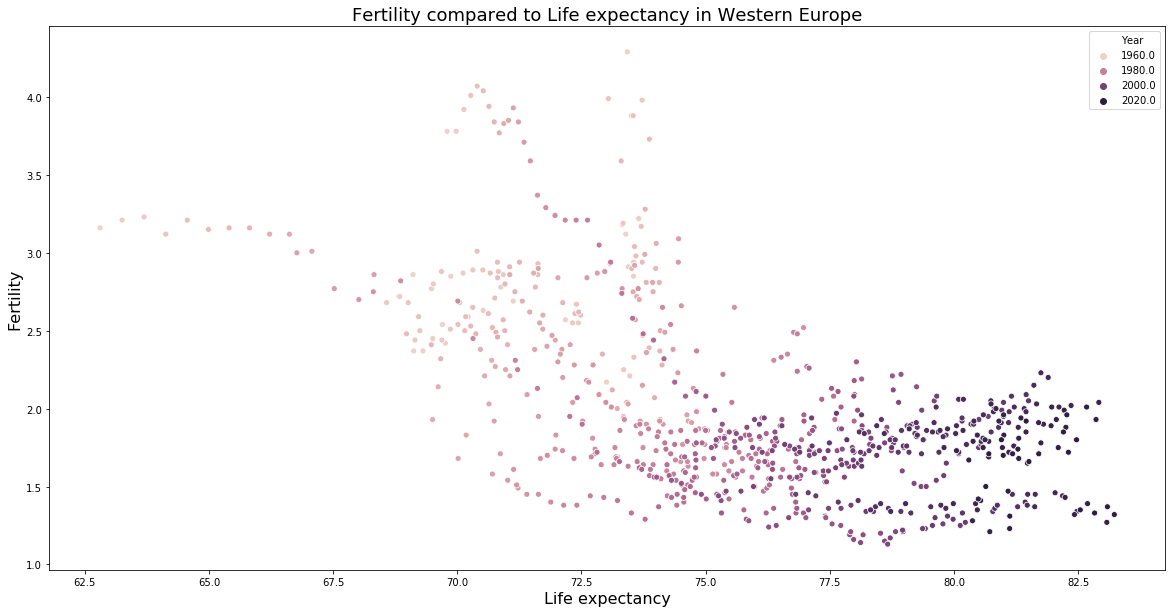

In [30]:
sns.color_palette("Blues")
plt.subplots(figsize=(20, 10))


ax = sns.scatterplot(data=western_europe, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax.set_title('Fertility compared to Life expectancy in Western Europe', fontsize=18)
ax.set_xlabel('Life expectancy', fontsize=16)
ax.set_ylabel('Fertility', fontsize=16)


Text(0.5, 1.0, 'Japan after 2000')

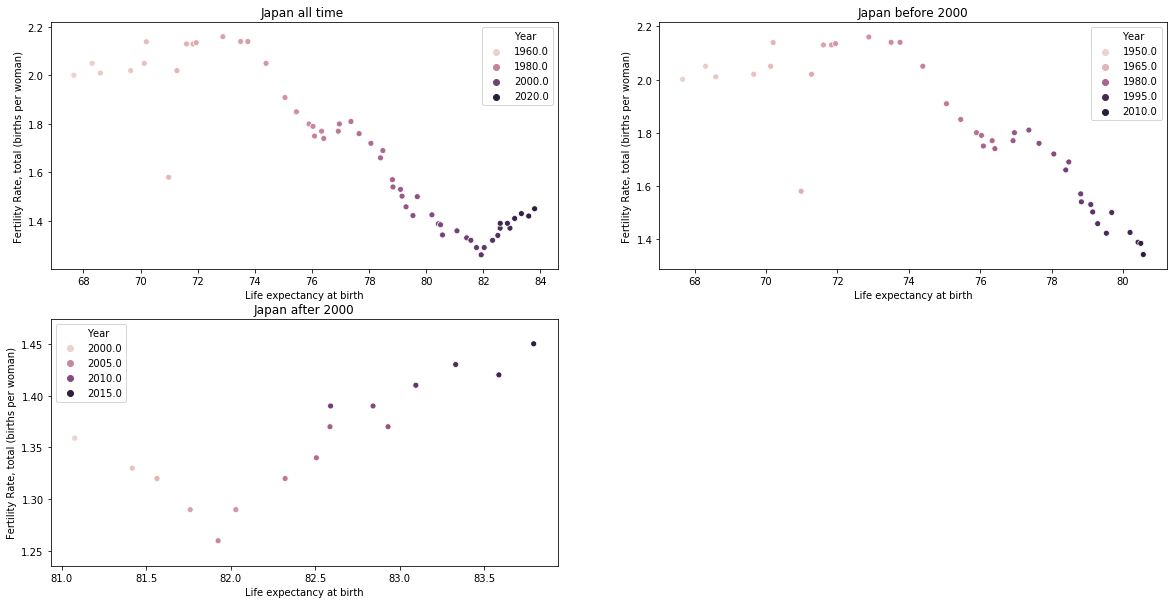

In [31]:
plt.subplots(figsize=(20,10))

plt.subplot(221)
ax = sns.scatterplot(data=japan, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax.set_title('Japan all time ')

plt.subplot(222)
ax1 = sns.scatterplot(data=japan_pre_2k, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax1.set_title('Japan before 2000')

plt.subplot(223)
ax2 = sns.scatterplot(data=japan_after_2k, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax2.set_title('Japan after 2000')

Text(0, 0.5, 'Fertility')

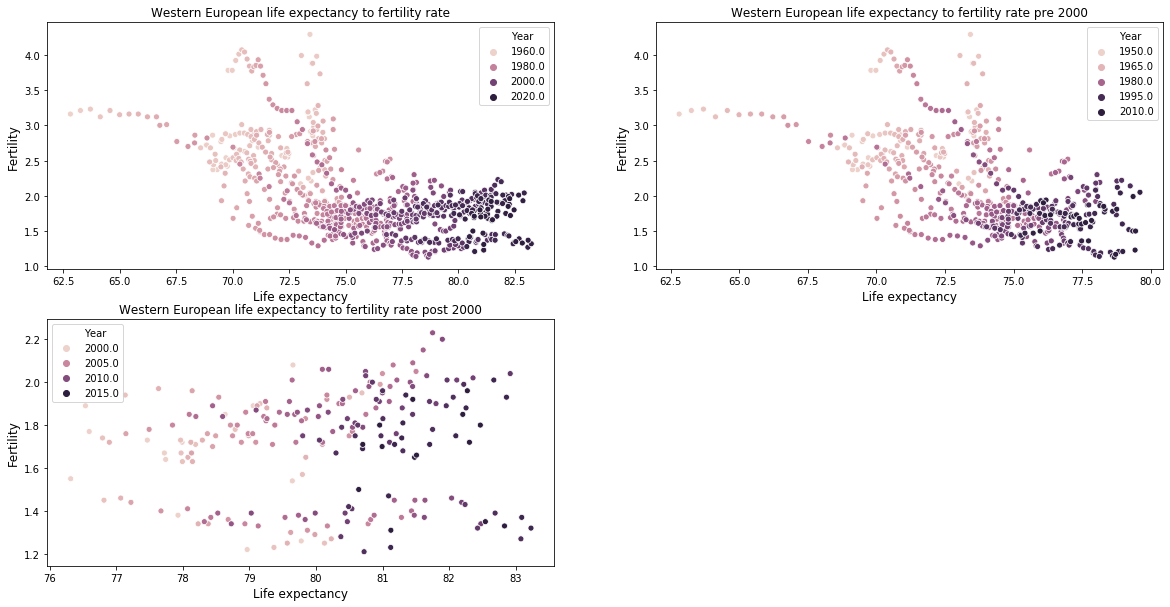

In [32]:
plt.subplots(figsize=(20,10))

plt.subplot(221)
ax = sns.scatterplot(data=western_europe, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax.set_title('Western European life expectancy to fertility rate')
ax.set_xlabel('Life expectancy', fontsize=12)
ax.set_ylabel('Fertility', fontsize=12)

plt.subplot(222)
ax1 = sns.scatterplot(data=western_europe_pre_2k, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax1.set_title('Western European life expectancy to fertility rate pre 2000')
ax1.set_xlabel('Life expectancy', fontsize=12)
ax1.set_ylabel('Fertility', fontsize=12)

plt.subplot(223)
ax2 = sns.scatterplot(data=western_europe_after_2k, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax2.set_title('Western European life expectancy to fertility rate post 2000')
ax2.set_xlabel('Life expectancy', fontsize=12)
ax2.set_ylabel('Fertility', fontsize=12)

Text(0, 0.5, 'Fertility')

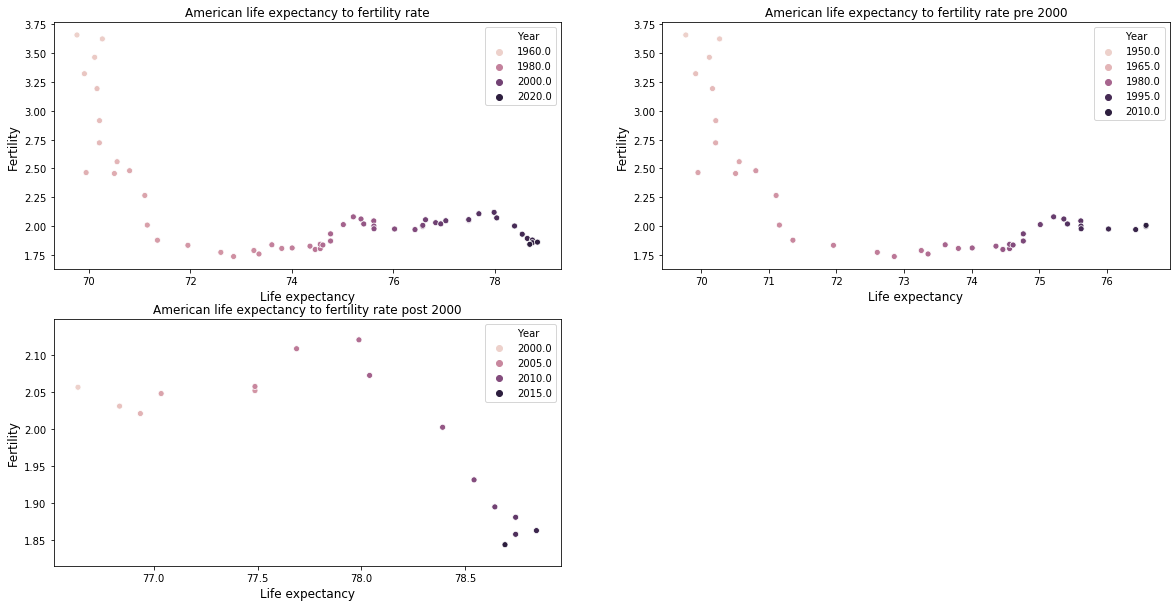

In [33]:
plt.subplots(figsize=(20,10))

plt.subplot(221)
ax = sns.scatterplot(data=america, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax.set_title('American life expectancy to fertility rate')
ax.set_xlabel('Life expectancy', fontsize=12)
ax.set_ylabel('Fertility', fontsize=12)

plt.subplot(222)
ax1 = sns.scatterplot(data=america_pre_2k, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax1.set_title('American life expectancy to fertility rate pre 2000')
ax1.set_xlabel('Life expectancy', fontsize=12)
ax1.set_ylabel('Fertility', fontsize=12)

plt.subplot(223)
ax2 = sns.scatterplot(data=america_after_2k, x='Life expectancy at birth', y='Fertility Rate, total (births per woman)', hue='Year')
ax2.set_title('American life expectancy to fertility rate post 2000')
ax2.set_xlabel('Life expectancy', fontsize=12)
ax2.set_ylabel('Fertility', fontsize=12)

## A/B test

### Hypothesis

* My thought is that millennials in the US are choosing not to have children to pursue their careers.
* They may also be opting out of having children due to the costs attached.
* Given access to free pre-kindergarten more professional young adults will be able to have families while still pursuing their careers

### Test

* I'll be choosing the US as my target area
* Because there are no specifics of fertility state by state, a random number of counties across the US should be selected, totaling 1% of the population. Those counties will get notifications that universal pre-k is available for anyone who chooses to take advantage. Ultimately I would want to increase the test size to 10%.
* The test will run for two years. If that test delivers a p-value of at least < .10 when tested against the rest of the country as a whole based on fertility, then the larger sample should be run for another two years. A p-value of <= .05 will be necessary to consider that test a success

### Other effects

* I do believe that while fertility is the primary goal of the trial, several other factors could contribute to a "successful" test.
* Increase in the number of women staying in the labor force as opposed to staying home after giving birth
* Improvement in general life satisfaction
* Pre-k early learning
* I would also be interested in seeing if there would be any correlation to wage increases in those counties on average.

